In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Loading our dataset
data=pd.read_csv("student_clustering.csv")
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


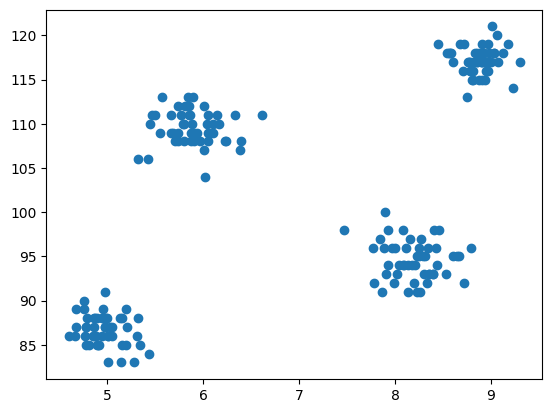

In [ ]:
#Plot of original dataset
plt.scatter(data["cgpa"],data["iq"])
plt.show()

In [ ]:
#Standardizing the original dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
data=scaler.transform(data)
data

array([[-1.14404869, -1.15364097],
       [-0.6687506 ,  0.9071682 ],
       [ 0.84973424, -0.74147914],
       [ 0.79417991, -0.41174967],
       [-0.94652221,  0.6598711 ],
       [-0.681096  ,  0.57743873],
       [ 0.88059775, -0.32931731],
       [ 1.12133315,  1.07203293],
       [-0.73665032,  0.6598711 ],
       [ 0.68307127, -0.65904677],
       [-1.47120193, -1.31850571],
       [-0.54529655,  0.6598711 ],
       [ 0.72628018, -0.41174967],
       [-1.22429383, -1.15364097],
       [-0.78603195,  0.49500636],
       [ 0.81887072, -0.57661441],
       [-0.9156587 ,  0.74230346],
       [ 0.54727181, -0.90634387],
       [-0.57616006,  0.74230346],
       [-0.70578681,  0.9071682 ],
       [ 0.30036371, -0.32931731],
       [-1.31071166, -1.31850571],
       [ 0.49171749, -0.82391151],
       [-1.36009328, -1.23607334],
       [-1.24898464, -1.15364097],
       [ 0.58430803, -0.32931731],
       [-1.31071166, -1.23607334],
       [ 1.35589585,  1.4017624 ],
       [ 0.65220775,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

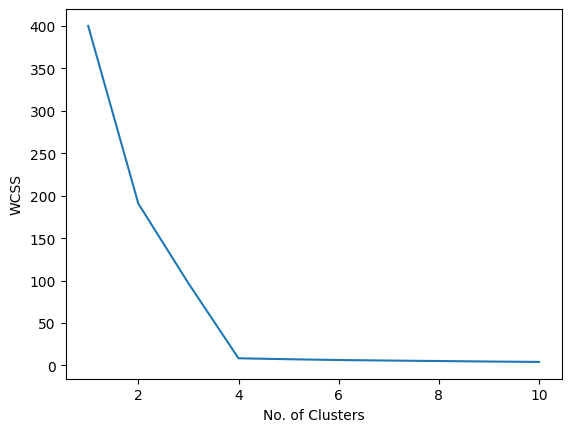

In [ ]:
#Making an elbow curve for the dataset to find the optimum number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.ylabel("WCSS")
plt.xlabel("No. of Clusters")
plt.show()

In [ ]:
#So from the elbow curve, elbow point seems to be at 4 ie. Optimum no. of clusters should be 04

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

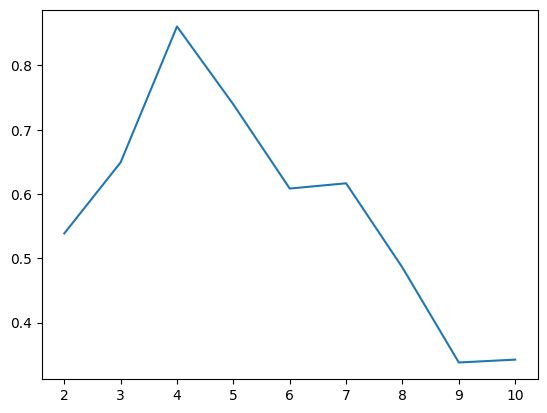

In [ ]:
#Let's check the silhuette score for different clusters
s_scores=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  score=silhouette_score(data,kmeans.labels_)
  s_scores.append(score)
plt.plot(range(2,11),s_scores)
plt.show()

In [ ]:
#According to silhouette score, the no. of clusters should be two. So let's create a subplot actually where the no. of clusters are two in one and four in other

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


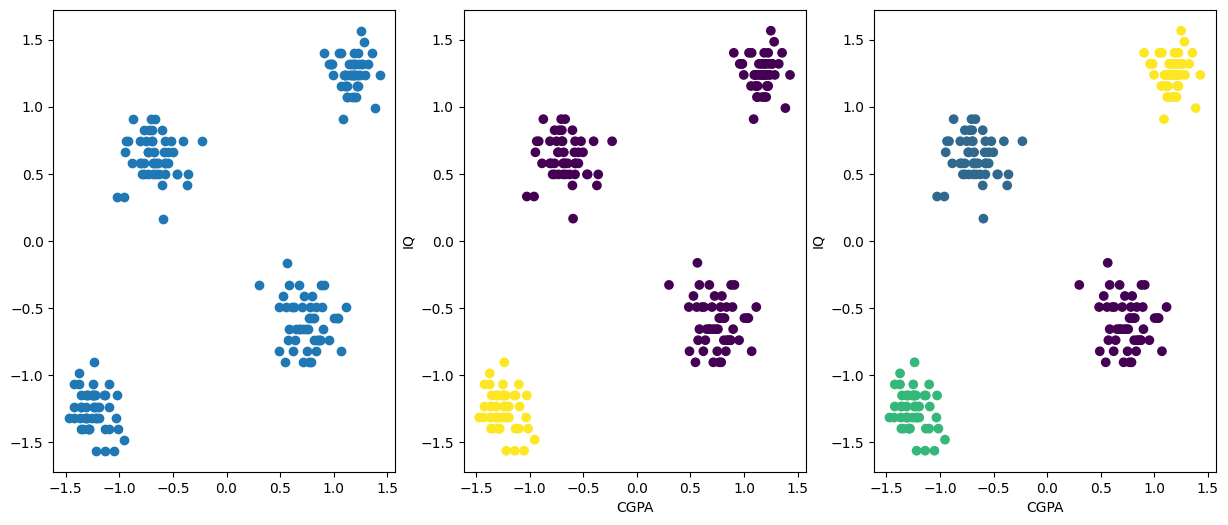

In [ ]:
kmeans1=KMeans(n_clusters=2)
kmeans1.fit(data)
labels1=kmeans1.labels_

kmeans2=KMeans(n_clusters=4)
kmeans2.fit(data)
labels2=kmeans2.labels_

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(data[:,0],data[:,1])
plt.subplot(1,3,2)
plt.scatter(data[:,0],data[:,1],c=labels1)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.subplot(1,3,3)
plt.scatter(data[:,0],data[:,1],c=labels2)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()